📊 ANALYSE AVANCÉE DES PERFORMANCES MARKETING

📂 Chargement des données...
✅ Données marketing chargées
✅ Données ventes chargées
📊 Marketing: 1000 lignes, 8 colonnes
📊 Sales: 1000 lignes, 7 colonnes

🔍 EXPLORATION DES DONNÉES
📋 Colonnes Marketing: ['Campaign_ID', 'Channel', 'Start_Date', 'End_Date', 'Budget', 'Impressions', 'Clicks', 'Conversions']
📋 Colonnes Sales: ['Sale_ID', 'Product_ID', 'Customer_ID', 'Date', 'Quantity', 'Sale_Price', 'Channel']

📄 APERÇU DES DONNÉES MARKETING:
   Campaign_ID   Channel  Start_Date    End_Date  Budget  Impressions  Clicks  \
0            1    Online  2023-01-01  2023-01-15  1000.0        50000    2000   
1            2  In-Store  2023-01-10  2023-01-20  1500.0        30000     500   
2            3    Social  2023-01-15  2023-01-25  2000.0        40000    1500   
3            4     Email  2023-01-05  2023-01-15   500.0        20000    1000   
4            5        TV  2023-01-01  2023-01-31  3000.0        60000    3000   

   Conversions  
0       

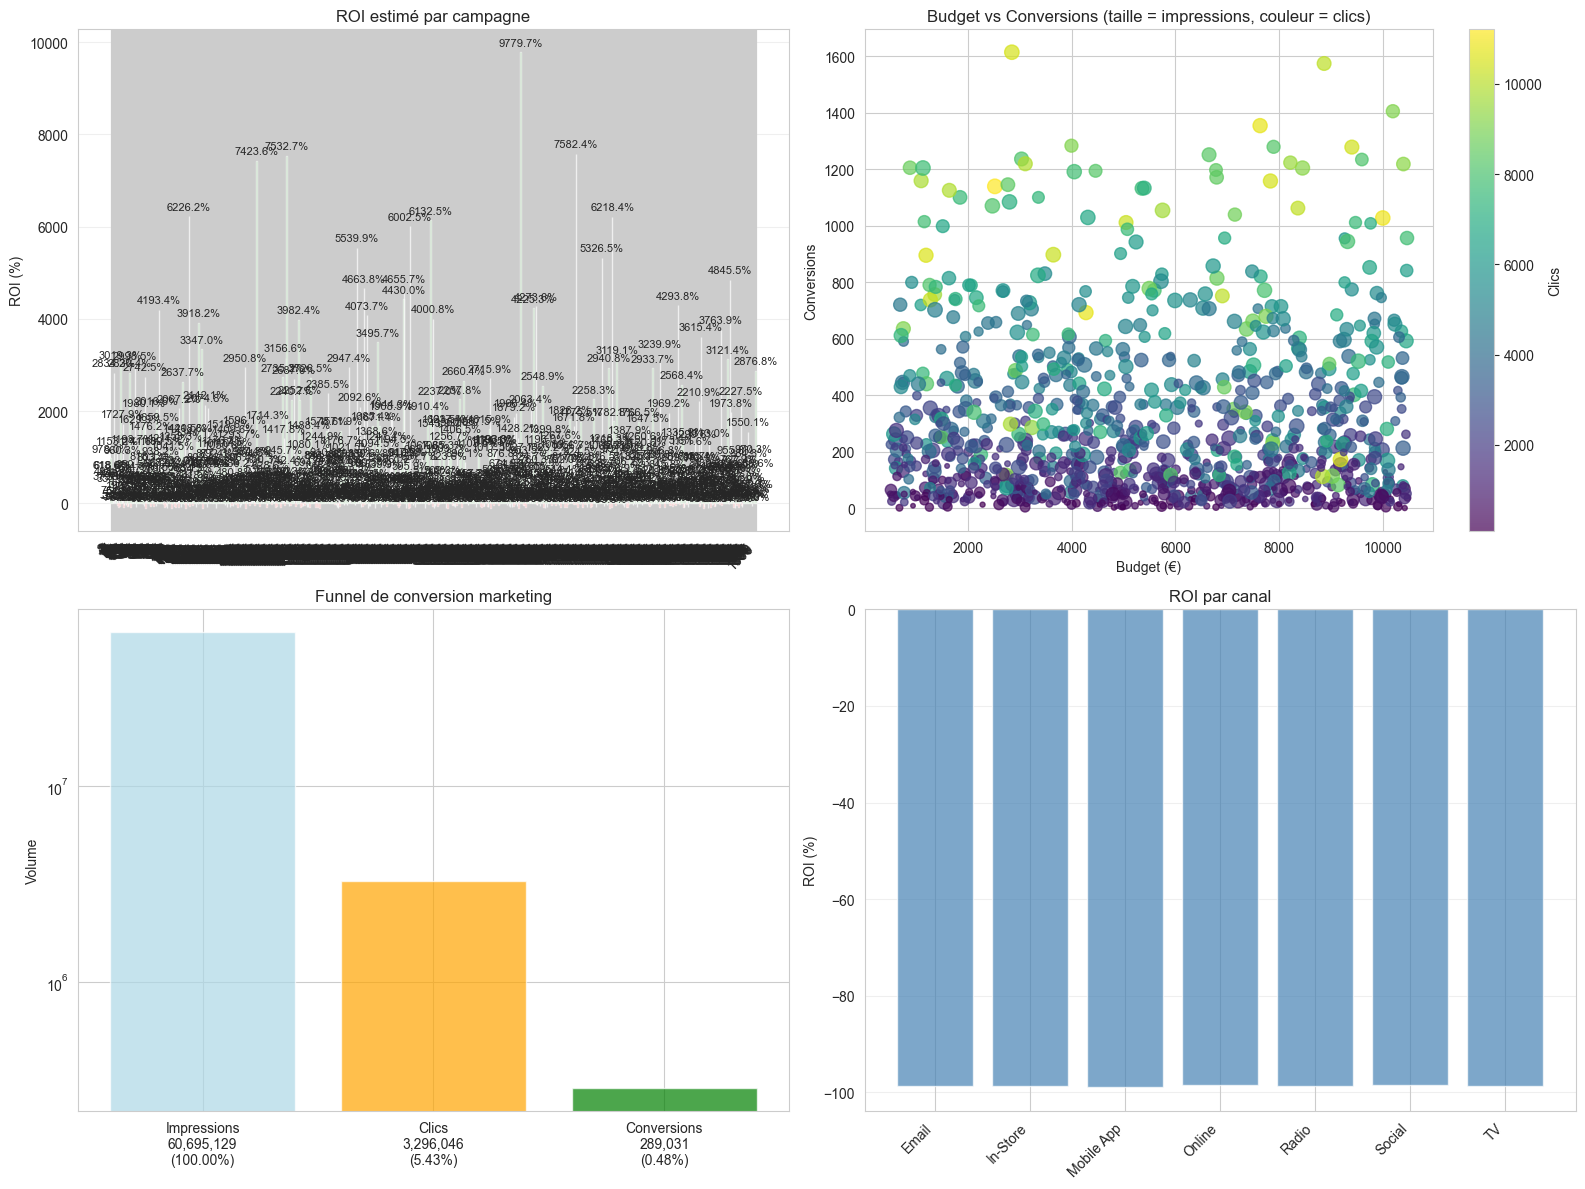

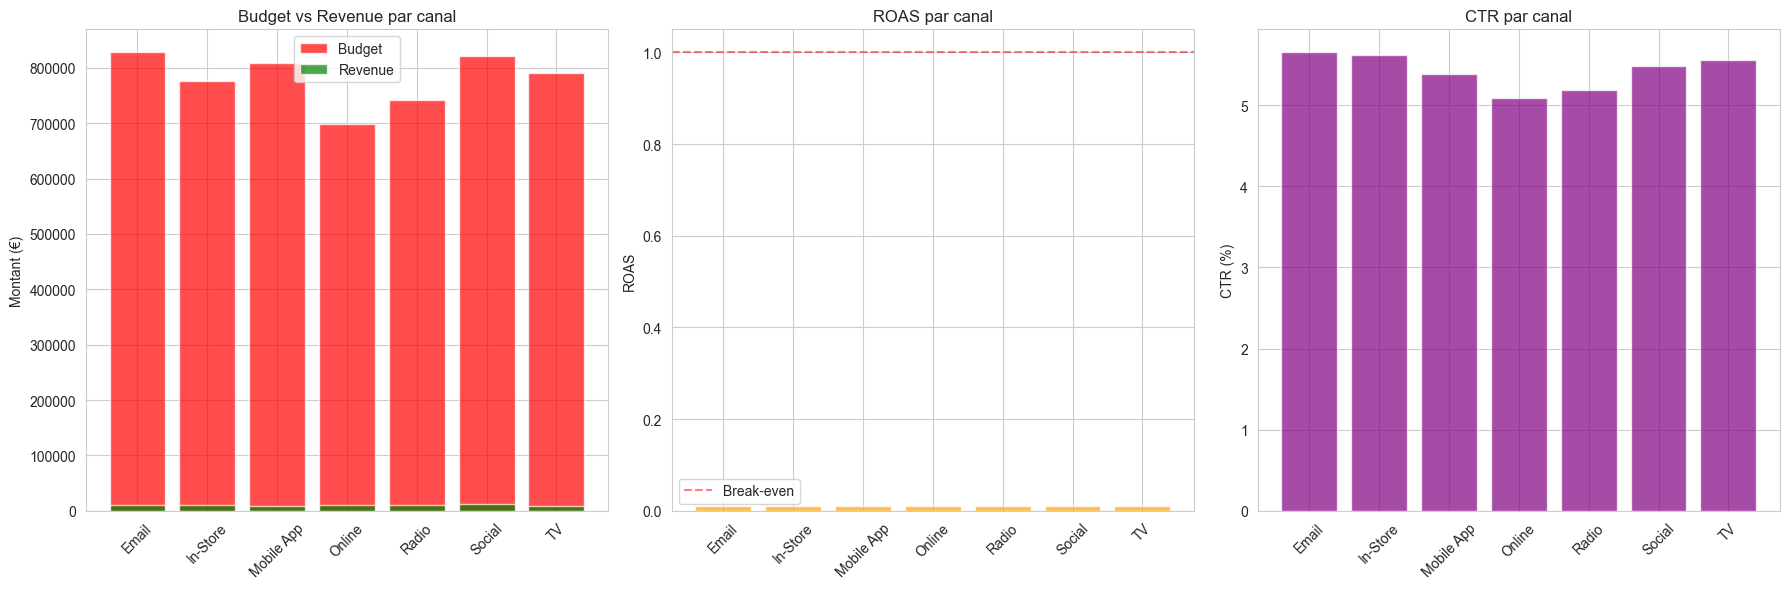


💡 RECOMMANDATIONS STRATÉGIQUES

🎯 ANALYSE GLOBALE:
   ⚠️ ROI global négatif: -98.7%
   ✅ Bon taux de conversion: 8.77%

📊 PERFORMANCE PAR CANAL:
   🏆 Meilleur canal: Online (ROI: -98.5%)
   ⚠️ Canal à améliorer: Mobile App (ROI: -98.9%)

💡 ACTIONS RECOMMANDÉES:
   1. URGENT: Revoir la stratégie marketing globale
   2. Revoir ou arrêter les campagnes Mobile App

📈 OPTIMISATIONS SUGGÉRÉES:
   • CTR actuel: 5.43% - Objectif: >2%
   • Taux de conversion: 8.77% - Objectif: >3%
   • CPA moyen: 18.90€ - À comparer avec la valeur client

💾 SAUVEGARDE DES RÉSULTATS
✅ Analyse par canal sauvegardée
✅ Rapport de synthèse sauvegardé

✅ ANALYSE MARKETING TERMINÉE!
💰 Budget analysé: 5,463,041.21€
📈 Revenue analysé: 71,863.58€
🎯 ROI global: -98.7%
📊 2 recommandations identifiées


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

print("📊 ANALYSE AVANCÉE DES PERFORMANCES MARKETING")
print("=" * 60)

# 📂 Chargement et vérification des données
try:
    print("\n📂 Chargement des données...")
    
    # Chargement des données
    marketing = pd.read_csv('../data/marketing_data.csv')
    sales = pd.read_csv('../data/sales_data.csv')
    
    print(f"✅ Données marketing chargées")
    print(f"✅ Données ventes chargées")
    print(f"📊 Marketing: {marketing.shape[0]} lignes, {marketing.shape[1]} colonnes")
    print(f"📊 Sales: {sales.shape[0]} lignes, {sales.shape[1]} colonnes")
    
except Exception as e:
    print(f"❌ Erreur lors du chargement: {e}")
    exit()

# 🔍 Exploration des données
print(f"\n🔍 EXPLORATION DES DONNÉES")
print("=" * 40)

print(f"📋 Colonnes Marketing: {list(marketing.columns)}")
print(f"📋 Colonnes Sales: {list(sales.columns)}")

# Affichage des premières lignes pour comprendre la structure
print(f"\n📄 APERÇU DES DONNÉES MARKETING:")
print(marketing.head())

print(f"\n📄 APERÇU DES DONNÉES SALES:")
print(sales.head())

# Conversion des dates
date_columns_marketing = ['Start_Date', 'End_Date']
for col in date_columns_marketing:
    if col in marketing.columns:
        try:
            marketing[col] = pd.to_datetime(marketing[col])
            print(f"✅ Dates marketing converties: {col}")
        except:
            print(f"⚠️ Erreur conversion dates: {col}")

if 'Date' in sales.columns:
    try:
        sales['Date'] = pd.to_datetime(sales['Date'])
        print(f"✅ Dates sales converties")
    except:
        print(f"⚠️ Erreur conversion dates sales")

# 📊 ANALYSE PAR CANAL
print(f"\n📊 ANALYSE PAR CANAL DE COMMUNICATION")
print("=" * 45)

# Les deux datasets ont une colonne 'Channel' - on peut analyser par canal
if 'Channel' in marketing.columns and 'Channel' in sales.columns:
    print("✅ Analyse par canal possible")
    
    # Agrégation des données marketing par canal
    marketing_by_channel = marketing.groupby('Channel').agg({
        'Budget': 'sum',
        'Impressions': 'sum', 
        'Clicks': 'sum',
        'Conversions': 'sum'
    }).reset_index()
    
    # Agrégation des données sales par canal
    sales_by_channel = sales.groupby('Channel').agg({
        'Sale_Price': ['sum', 'mean', 'count'],
        'Quantity': 'sum'
    }).reset_index()
    
    # Aplatir les colonnes multi-niveau
    sales_by_channel.columns = ['Channel', 'Total_Revenue', 'Avg_Sale_Price', 'Total_Sales', 'Total_Quantity']
    
    # Jointure des données par canal
    channel_analysis = pd.merge(marketing_by_channel, sales_by_channel, on='Channel', how='outer')
    channel_analysis = channel_analysis.fillna(0)
    
    print("\n📈 PERFORMANCE PAR CANAL:")
    print(channel_analysis)
    
    # Calcul des KPIs par canal
    channel_analysis['CTR'] = (channel_analysis['Clicks'] / channel_analysis['Impressions'] * 100).round(2)
    channel_analysis['Cost_Per_Click'] = (channel_analysis['Budget'] / channel_analysis['Clicks']).round(2)
    channel_analysis['Cost_Per_Conversion'] = (channel_analysis['Budget'] / channel_analysis['Conversions']).round(2)
    channel_analysis['ROI'] = ((channel_analysis['Total_Revenue'] - channel_analysis['Budget']) / channel_analysis['Budget'] * 100).round(2)
    channel_analysis['ROAS'] = (channel_analysis['Total_Revenue'] / channel_analysis['Budget']).round(2)
    
    # Remplacer les infinis par 0
    channel_analysis = channel_analysis.replace([float('inf'), -float('inf')], 0)
    
    print(f"\n📊 KPIs PAR CANAL:")
    kpi_cols = ['Channel', 'Budget', 'Total_Revenue', 'Conversions', 'Total_Sales', 'CTR', 'Cost_Per_Click', 'ROI', 'ROAS']
    print(channel_analysis[kpi_cols])

else:
    print("⚠️ Pas de colonne Channel commune - analyse séparée")
    channel_analysis = None

# 📊 ANALYSE MARKETING GLOBALE
print(f"\n📊 ANALYSE MARKETING GLOBALE")
print("=" * 35)

# KPIs Marketing globaux
total_budget = marketing['Budget'].sum()
total_impressions = marketing['Impressions'].sum()
total_clicks = marketing['Clicks'].sum()
total_conversions = marketing['Conversions'].sum()

print(f"💰 Budget total: {total_budget:,.2f}€")
print(f"👁️ Impressions totales: {total_impressions:,}")
print(f"👆 Clics totaux: {total_clicks:,}")
print(f"🎯 Conversions totales: {total_conversions:,}")

# KPIs calculés
global_ctr = (total_clicks / total_impressions * 100) if total_impressions > 0 else 0
global_conversion_rate = (total_conversions / total_clicks * 100) if total_clicks > 0 else 0
global_cpc = (total_budget / total_clicks) if total_clicks > 0 else 0
global_cpa = (total_budget / total_conversions) if total_conversions > 0 else 0

print(f"📊 CTR global: {global_ctr:.2f}%")
print(f"📈 Taux de conversion global: {global_conversion_rate:.2f}%")
print(f"💰 CPC moyen: {global_cpc:.2f}€")
print(f"🎯 CPA moyen: {global_cpa:.2f}€")

# 📊 ANALYSE SALES GLOBALE
print(f"\n📊 ANALYSE VENTES GLOBALE")
print("=" * 30)

# KPIs Sales globaux
total_revenue = sales['Sale_Price'].sum()
total_sales_count = len(sales)
total_quantity = sales['Quantity'].sum()
avg_sale_price = sales['Sale_Price'].mean()

print(f"💰 Chiffre d'affaires total: {total_revenue:,.2f}€")
print(f"📊 Nombre de ventes: {total_sales_count:,}")
print(f"📦 Quantité totale vendue: {total_quantity:,}")
print(f"💰 Prix de vente moyen: {avg_sale_price:.2f}€")

# ROI global (si on peut lier marketing et sales)
global_roi = ((total_revenue - total_budget) / total_budget * 100) if total_budget > 0 else 0
global_roas = (total_revenue / total_budget) if total_budget > 0 else 0

print(f"📈 ROI global: {global_roi:.2f}%")
print(f"📊 ROAS global: {global_roas:.2f}")

# 📊 VISUALISATIONS
print(f"\n📊 GÉNÉRATION DES VISUALISATIONS...")

# 1. Dashboard principal
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Performance marketing par campagne
if len(marketing) > 1:
    marketing_display = marketing.copy()
    if 'Campaign_ID' in marketing_display.columns:
        marketing_display['Campaign'] = marketing_display['Campaign_ID']
    else:
        marketing_display['Campaign'] = [f'Campaign_{i+1}' for i in range(len(marketing_display))]
    
    # ROI par campagne (estimation basée sur les conversions)
    marketing_display['Estimated_Revenue'] = marketing_display['Conversions'] * avg_sale_price
    marketing_display['ROI'] = ((marketing_display['Estimated_Revenue'] - marketing_display['Budget']) / marketing_display['Budget'] * 100)
    
    bars1 = ax1.bar(range(len(marketing_display)), marketing_display['ROI'], 
                    color=['green' if x > 0 else 'red' for x in marketing_display['ROI']], alpha=0.7)
    ax1.set_xticks(range(len(marketing_display)))
    ax1.set_xticklabels(marketing_display['Campaign'], rotation=45, ha='right')
    ax1.set_ylabel('ROI (%)')
    ax1.set_title('ROI estimé par campagne')
    ax1.grid(axis='y', alpha=0.3)
    
    # Ajout des valeurs sur les barres
    for bar, val in zip(bars1, marketing_display['ROI']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (max(marketing_display['ROI']) * 0.01), 
                f'{val:.1f}%', ha='center', va='bottom', fontsize=8)

# Budget vs Conversions
scatter = ax2.scatter(marketing['Budget'], marketing['Conversions'], 
                     s=marketing['Impressions']/1000, alpha=0.7, c=marketing['Clicks'], cmap='viridis')
ax2.set_xlabel('Budget (€)')
ax2.set_ylabel('Conversions')
ax2.set_title('Budget vs Conversions (taille = impressions, couleur = clics)')
plt.colorbar(scatter, ax=ax2, label='Clics')

# Funnel de conversion marketing
funnel_data = ['Impressions', 'Clics', 'Conversions']
funnel_values = [total_impressions, total_clicks, total_conversions]
funnel_rates = [
    100,  # Base
    (total_clicks / total_impressions * 100) if total_impressions > 0 else 0,
    (total_conversions / total_impressions * 100) if total_impressions > 0 else 0
]

bars3 = ax3.bar(range(len(funnel_data)), funnel_values, color=['lightblue', 'orange', 'green'], alpha=0.7)
ax3.set_xticks(range(len(funnel_data)))
ax3.set_xticklabels([f"{data}\n{val:,}\n({rate:.2f}%)" for data, val, rate in zip(funnel_data, funnel_values, funnel_rates)])
ax3.set_ylabel('Volume')
ax3.set_title('Funnel de conversion marketing')
ax3.set_yscale('log')  # Échelle logarithmique pour mieux voir les différences

# Performance par canal (si disponible)
if channel_analysis is not None and len(channel_analysis) > 1:
    channel_analysis_clean = channel_analysis[channel_analysis['ROI'] != 0]
    if len(channel_analysis_clean) > 0:
        bars4 = ax4.bar(range(len(channel_analysis_clean)), channel_analysis_clean['ROI'], 
                       color='steelblue', alpha=0.7)
        ax4.set_xticks(range(len(channel_analysis_clean)))
        ax4.set_xticklabels(channel_analysis_clean['Channel'], rotation=45, ha='right')
        ax4.set_ylabel('ROI (%)')
        ax4.set_title('ROI par canal')
        ax4.grid(axis='y', alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Données insuffisantes\npour l\'analyse par canal', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('ROI par canal')
else:
    # Analyse des ventes par date si disponible
    if 'Date' in sales.columns:
        sales_by_date = sales.groupby(sales['Date'].dt.date)['Sale_Price'].sum()
        if len(sales_by_date) > 1:
            sales_by_date.plot(kind='line', ax=ax4, marker='o', color='green')
            ax4.set_title('Évolution des ventes dans le temps')
            ax4.set_ylabel('Chiffre d\'affaires (€)')
            ax4.tick_params(axis='x', rotation=45)
        else:
            ax4.text(0.5, 0.5, 'Données de ventes\ninsuffisantes', 
                    ha='center', va='center', transform=ax4.transAxes, fontsize=12)
            ax4.set_title('Évolution des ventes')

plt.tight_layout()
plt.show()

# 2. Analyse détaillée par canal (si disponible)
if channel_analysis is not None and len(channel_analysis) > 1:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Budget vs Revenue par canal
    ax1.bar(channel_analysis['Channel'], channel_analysis['Budget'], alpha=0.7, label='Budget', color='red')
    ax1.bar(channel_analysis['Channel'], channel_analysis['Total_Revenue'], alpha=0.7, label='Revenue', color='green')
    ax1.set_title('Budget vs Revenue par canal')
    ax1.set_ylabel('Montant (€)')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # ROAS par canal
    ax2.bar(channel_analysis['Channel'], channel_analysis['ROAS'], color='orange', alpha=0.7)
    ax2.set_title('ROAS par canal')
    ax2.set_ylabel('ROAS')
    ax2.tick_params(axis='x', rotation=45)
    ax2.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Break-even')
    ax2.legend()
    
    # CTR par canal
    ax3.bar(channel_analysis['Channel'], channel_analysis['CTR'], color='purple', alpha=0.7)
    ax3.set_title('CTR par canal')
    ax3.set_ylabel('CTR (%)')
    ax3.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# 💡 RECOMMANDATIONS
print(f"\n💡 RECOMMANDATIONS STRATÉGIQUES")
print("=" * 40)

recommendations = []

print(f"\n🎯 ANALYSE GLOBALE:")
if global_roi > 0:
    print(f"   ✅ ROI global positif: {global_roi:.1f}%")
else:
    print(f"   ⚠️ ROI global négatif: {global_roi:.1f}%")
    recommendations.append("URGENT: Revoir la stratégie marketing globale")

if global_conversion_rate > 2:
    print(f"   ✅ Bon taux de conversion: {global_conversion_rate:.2f}%")
else:
    print(f"   ⚠️ Taux de conversion faible: {global_conversion_rate:.2f}%")
    recommendations.append("Optimiser les landing pages et le ciblage")

print(f"\n📊 PERFORMANCE PAR CANAL:")
if channel_analysis is not None:
    best_channel = channel_analysis.loc[channel_analysis['ROI'].idxmax()]
    worst_channel = channel_analysis.loc[channel_analysis['ROI'].idxmin()]
    
    print(f"   🏆 Meilleur canal: {best_channel['Channel']} (ROI: {best_channel['ROI']:.1f}%)")
    print(f"   ⚠️ Canal à améliorer: {worst_channel['Channel']} (ROI: {worst_channel['ROI']:.1f}%)")
    
    if best_channel['ROI'] > 50:
        recommendations.append(f"Augmenter le budget sur {best_channel['Channel']}")
    if worst_channel['ROI'] < 0:
        recommendations.append(f"Revoir ou arrêter les campagnes {worst_channel['Channel']}")

print(f"\n💡 ACTIONS RECOMMANDÉES:")
if recommendations:
    for i, rec in enumerate(recommendations, 1):
        print(f"   {i}. {rec}")
else:
    print("   ✅ Performance globalement satisfaisante")

# Recommandations détaillées
print(f"\n📈 OPTIMISATIONS SUGGÉRÉES:")
print(f"   • CTR actuel: {global_ctr:.2f}% - Objectif: >2%")
print(f"   • Taux de conversion: {global_conversion_rate:.2f}% - Objectif: >3%")
print(f"   • CPA moyen: {global_cpa:.2f}€ - À comparer avec la valeur client")

# 💾 SAUVEGARDE
print(f"\n💾 SAUVEGARDE DES RÉSULTATS")
print("=" * 35)

try:
    import os
    os.makedirs('../results', exist_ok=True)
    
    # Sauvegarde des analyses
    if channel_analysis is not None:
        channel_analysis.to_csv('../results/channel_analysis.csv', index=False)
        print(f"✅ Analyse par canal sauvegardée")
    
    # Création d'un rapport consolidé
    report_data = {
        'Metric': ['Budget Total', 'Revenue Total', 'ROI Global', 'CTR Global', 'Taux Conversion', 'CPA Moyen'],
        'Value': [f"{total_budget:.2f}€", f"{total_revenue:.2f}€", f"{global_roi:.2f}%", 
                 f"{global_ctr:.2f}%", f"{global_conversion_rate:.2f}%", f"{global_cpa:.2f}€"],
        'Status': ['Info', 'Info', 'Good' if global_roi > 0 else 'Warning', 
                  'Good' if global_ctr > 2 else 'Warning',
                  'Good' if global_conversion_rate > 3 else 'Warning', 'Info']
    }
    
    report_df = pd.DataFrame(report_data)
    report_df.to_csv('../results/marketing_summary.csv', index=False)
    print(f"✅ Rapport de synthèse sauvegardé")
    
except Exception as e:
    print(f"⚠️ Erreur lors de la sauvegarde: {e}")

print(f"\n" + "="*60)
print("✅ ANALYSE MARKETING TERMINÉE!")
print("="*60)
print(f"💰 Budget analysé: {total_budget:,.2f}€")
print(f"📈 Revenue analysé: {total_revenue:,.2f}€")
print(f"🎯 ROI global: {global_roi:.1f}%")
print(f"📊 {len(recommendations)} recommandations identifiées")
print("="*60)